**SIN-393 - Introdução à Visão Computacional (2022-2)**

# Aula 05 - Redes Neurais Artificiais 1

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importando as bibliotecas necessárias
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, preprocessing, model_selection

%matplotlib notebook

## Algoritmo de treinamento do perceptron
---



In [2]:
def superficie_decisao(X, y, w, b, str_title):
    """
    Plota a superfície de decisão para a época atual
    """

    # Define os pontos extremos do segmento da superficie de decisão plotado.
    # p0 = (x0_min, f_x0_min)
    # p1 = (x0_max, f_x0_max)
    # ----------
    x0_min = X.min() - 1.
    x0_max = X.max() + 1.
    # ----------
    f_x0_min = -(w[0] / w[1]) * x0_min - (b / w[1])
    f_x0_max = -(w[0] / w[1]) * x0_max - (b / w[1])

    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    plt.figure()
    # Plota o conjunto de treinamento.
    for y_ in np.unique(y):
        plt.scatter(X[y==y_][:,0], X[y==y_][:,1], color=colors[y_], label=str(y_))

    # Rótulos, legendas e título 
    plt.xlabel('x_0')
    plt.ylabel('x_1')
    plt.legend()
    plt.title(str_title)

    # Limita o espaço visualizado.
    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)

    # Plota a superfície de decisão.
    plt.plot([x0_min, x0_max], [f_x0_min, f_x0_max], color='b')

    # Mostra a figura.
    plt.show()

### Função para treinamento do modelo

In [3]:
def fit(X, y, plot=True):
    """
    Treina o modelo.
    """
    print('Inicialização')
    print('====================')
    
    # Inicialização dos pesos W
    w = np.random.rand(X.shape[1]) 
    print(f'\nPesos: {w}')

    # Inicialização dos bias b
    b = np.random.rand() 
    print(f'Bias: {b}')

    # Lista contendo os erros em cada época
    erros_epocas = []

    # Plota a superfície de decisão na tela.
    if plot:
        title_str = str('Inicialização')
        superficie_decisao(X, y, w, b, title_str)

    # Épocas de treinamento.
    # ----------------------
    for i in range(max_iter):
        print('\nÉpoca %i' % i)
        print('====================')

        # Erro total na época.
        erro_epoca = 0

        # Itera ao longo dos elementos do conjunto de dadaos
        for j in range(X.shape[0]):
            print('\nIteração %i' % j)
            print('--------------------')

            # v: combinação linear
            v = np.dot(X[j,:], w) + b
            print(f'v: {v}')

            # y^: Função de ativação degrau.
            y_out = np.where(v >= 0., 1, 0)
            print(f'y_out: {y_out}')

            # Erro
            erro = y[j] - y_out
            print(f'Erro: {erro}')

            # Erro total na época. Utiliza o erro quadrático.
            erro_epoca = erro_epoca + erro**2

            # Atualização dos pesos W
            w = w +  learning_rate * np.dot(erro, X[j,:])
            print(f'Pesos: {w}')

            # Atualização dos bias, b
            b = b +  learning_rate * erro.sum()
            print(f'Bias: {b}')

        # Erro total da época.
        erro_epoca = erro_epoca / 2.
        print('--------------------')
        print(f'\nErro da época: {erro_epoca}')

        # Adiciona o erro da época à lista de erros.
        erros_epocas.append(erro_epoca)

        # Plota a superfície de decisão
        if plot:
            title_str = str('Época %d' % i)
            superficie_decisao(X, y, w, b, title_str)

        # Interromper o treinamento se erro da época for menor do que um limiar pré-determinado.
        if np.abs(erro_epoca) <= 0.01:
            break

## Treinando o modelo com funções binárias
---

In [4]:
# Dados
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])


# Funções binárias
# ================
# AND
y_and = np.array([0, 0, 0, 1])

# OR
y_or = np.array([0, 1, 1, 1])

# XOR
y_xor = np.array([0, 1, 1, 0])

### Função AND

Inicialização

Pesos: [0.19151945 0.62210877]
Bias: 0.4377277390071145


<IPython.core.display.Javascript object>


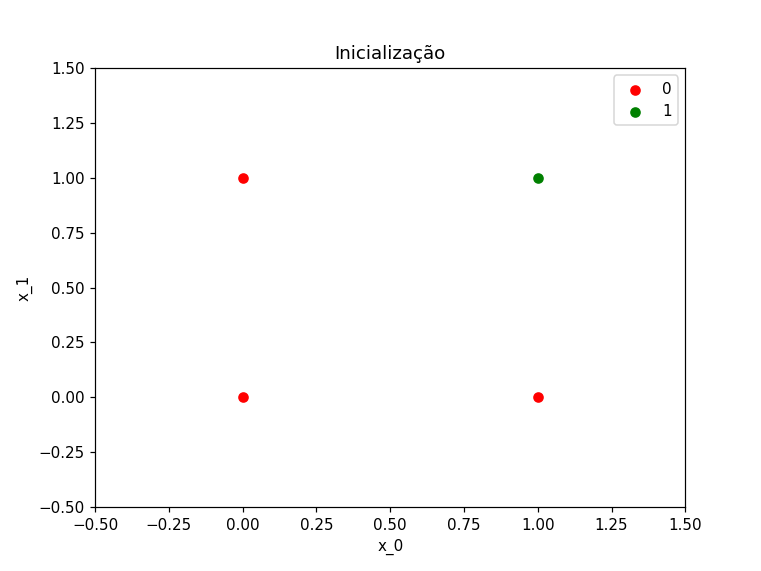


Época 0

Iteração 0
--------------------
v: 0.4377277390071145
y_out: 1
Erro: -1
Pesos: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteração 1
--------------------
v: 0.9598365100469464
y_out: 1
Erro: -1
Pesos: [0.19151945 0.52210877]
Bias: 0.2377277390071145

Iteração 2
--------------------
v: 0.4292471893860068
y_out: 1
Erro: -1
Pesos: [0.09151945 0.52210877]
Bias: 0.1377277390071145

Iteração 3
--------------------
v: 0.7513559604258386
y_out: 1
Erro: 0
Pesos: [0.09151945 0.52210877]
Bias: 0.1377277390071145
--------------------

Erro da época: 1.5


<IPython.core.display.Javascript object>


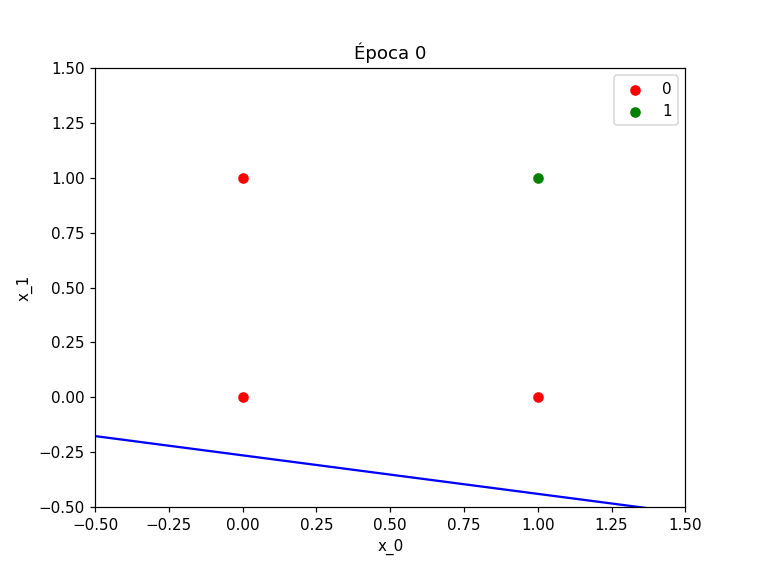


Época 1

Iteração 0
--------------------
v: 0.1377277390071145
y_out: 1
Erro: -1
Pesos: [0.09151945 0.52210877]
Bias: 0.037727739007114486

Iteração 1
--------------------
v: 0.5598365100469463
y_out: 1
Erro: -1
Pesos: [0.09151945 0.42210877]
Bias: -0.06227226099288552

Iteração 2
--------------------
v: 0.02924718938600676
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.42210877]
Bias: -0.16227226099288553

Iteração 3
--------------------
v: 0.25135596042583863
y_out: 1
Erro: 0
Pesos: [-0.00848055  0.42210877]
Bias: -0.16227226099288553
--------------------

Erro da época: 1.5


<IPython.core.display.Javascript object>


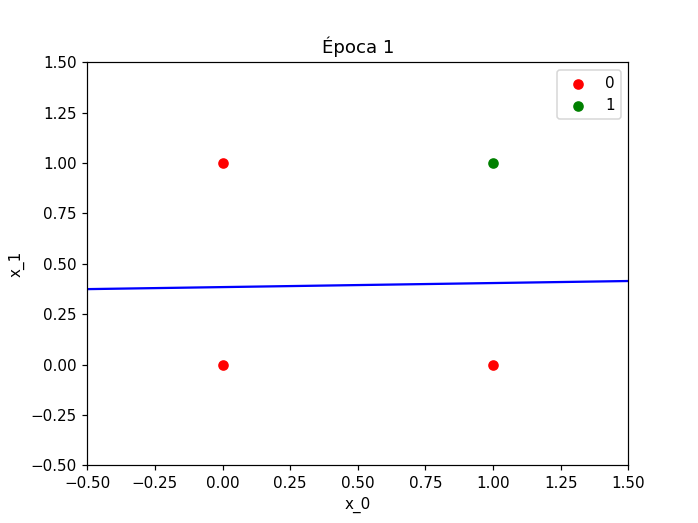


Época 2

Iteração 0
--------------------
v: -0.16227226099288553
y_out: 0
Erro: 0
Pesos: [-0.00848055  0.42210877]
Bias: -0.16227226099288553

Iteração 1
--------------------
v: 0.2598365100469464
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.32210877]
Bias: -0.26227226099288553

Iteração 2
--------------------
v: -0.27075281061399326
y_out: 0
Erro: 0
Pesos: [-0.00848055  0.32210877]
Bias: -0.26227226099288553

Iteração 3
--------------------
v: 0.051355960425838676
y_out: 1
Erro: 0
Pesos: [-0.00848055  0.32210877]
Bias: -0.26227226099288553
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


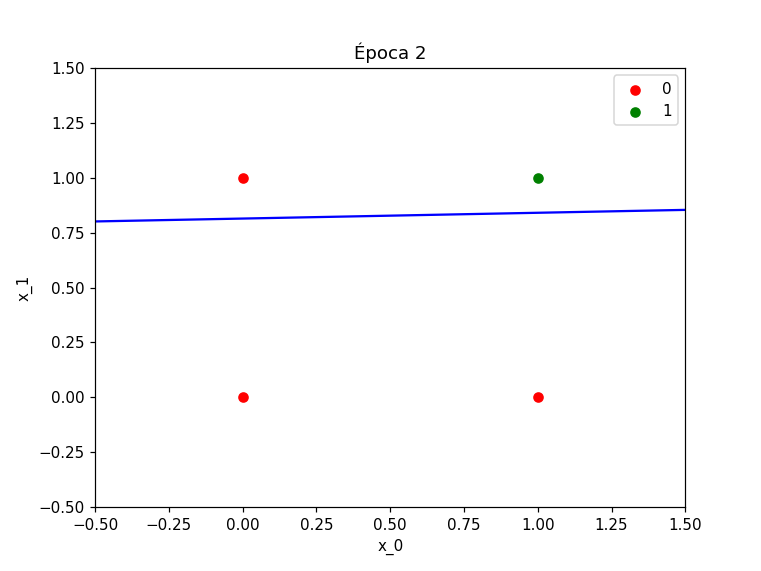


Época 3

Iteração 0
--------------------
v: -0.26227226099288553
y_out: 0
Erro: 0
Pesos: [-0.00848055  0.32210877]
Bias: -0.26227226099288553

Iteração 1
--------------------
v: 0.0598365100469464
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.22210877]
Bias: -0.36227226099288556

Iteração 2
--------------------
v: -0.3707528106139933
y_out: 0
Erro: 0
Pesos: [-0.00848055  0.22210877]
Bias: -0.36227226099288556

Iteração 3
--------------------
v: -0.14864403957416136
y_out: 0
Erro: 1
Pesos: [0.09151945 0.32210877]
Bias: -0.2622722609928856
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


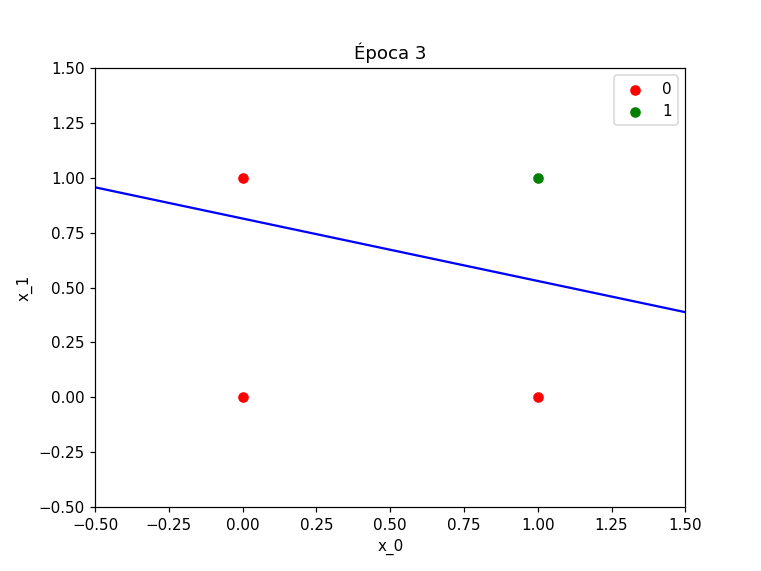


Época 4

Iteração 0
--------------------
v: -0.2622722609928856
y_out: 0
Erro: 0
Pesos: [0.09151945 0.32210877]
Bias: -0.2622722609928856

Iteração 1
--------------------
v: 0.059836510046946345
y_out: 1
Erro: -1
Pesos: [0.09151945 0.22210877]
Bias: -0.36227226099288556

Iteração 2
--------------------
v: -0.27075281061399326
y_out: 0
Erro: 0
Pesos: [0.09151945 0.22210877]
Bias: -0.36227226099288556

Iteração 3
--------------------
v: -0.04864403957416136
y_out: 0
Erro: 1
Pesos: [0.19151945 0.32210877]
Bias: -0.2622722609928856
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


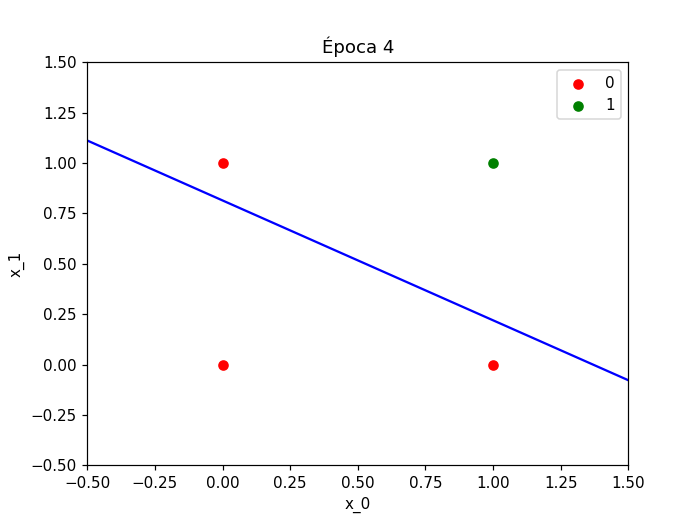


Época 5

Iteração 0
--------------------
v: -0.2622722609928856
y_out: 0
Erro: 0
Pesos: [0.19151945 0.32210877]
Bias: -0.2622722609928856

Iteração 1
--------------------
v: 0.059836510046946345
y_out: 1
Erro: -1
Pesos: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteração 2
--------------------
v: -0.17075281061399328
y_out: 0
Erro: 0
Pesos: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteração 3
--------------------
v: 0.051355960425838676
y_out: 1
Erro: 0
Pesos: [0.19151945 0.22210877]
Bias: -0.36227226099288556
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


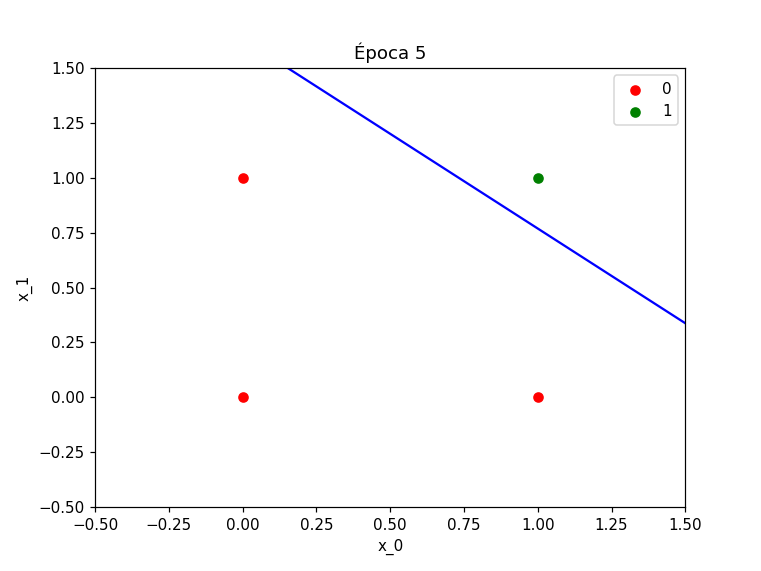


Época 6

Iteração 0
--------------------
v: -0.36227226099288556
y_out: 0
Erro: 0
Pesos: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteração 1
--------------------
v: -0.14016348995305364
y_out: 0
Erro: 0
Pesos: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteração 2
--------------------
v: -0.17075281061399328
y_out: 0
Erro: 0
Pesos: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteração 3
--------------------
v: 0.051355960425838676
y_out: 1
Erro: 0
Pesos: [0.19151945 0.22210877]
Bias: -0.36227226099288556
--------------------

Erro da época: 0.0


<IPython.core.display.Javascript object>


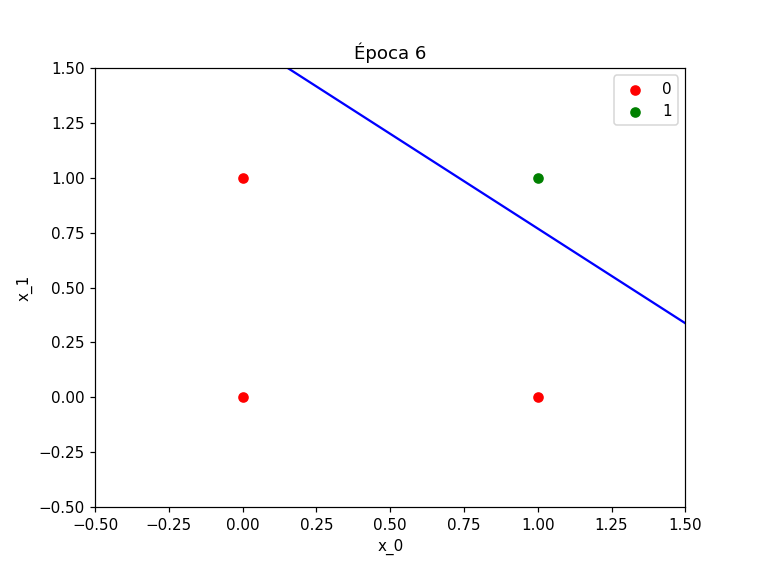

In [5]:
# Número máximo de iterações.
max_iter = 20

# Taxa de aprendizado.
learning_rate = 0.1

# Define um valor para a semente de geração de números aleatórios.
np.random.seed(1234)

# Treinamento do Perceptron
# -------------------------
fit(X, y_and)

### Função OR

Inicialização

Pesos: [0.19151945 0.62210877]
Bias: 0.4377277390071145


<IPython.core.display.Javascript object>


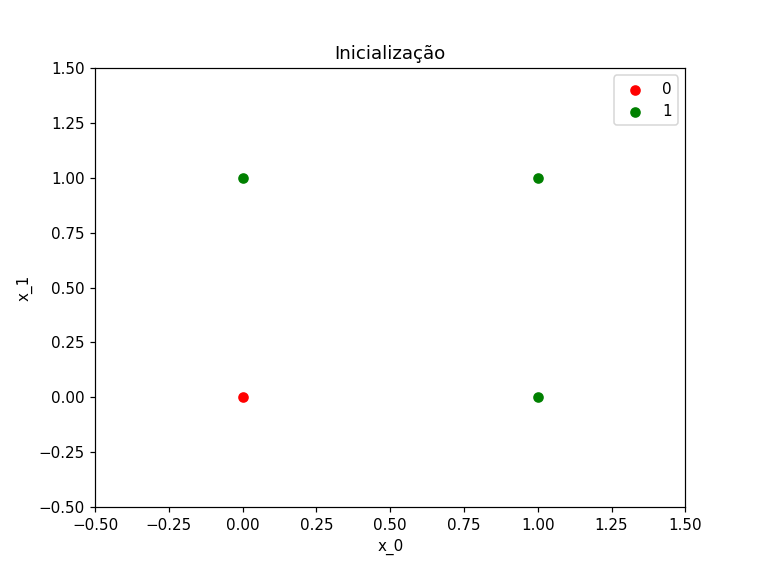


Época 0

Iteração 0
--------------------
v: 0.4377277390071145
y_out: 1
Erro: -1
Pesos: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteração 1
--------------------
v: 0.9598365100469464
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteração 2
--------------------
v: 0.5292471893860068
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteração 3
--------------------
v: 1.1513559604258385
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.3377277390071145
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


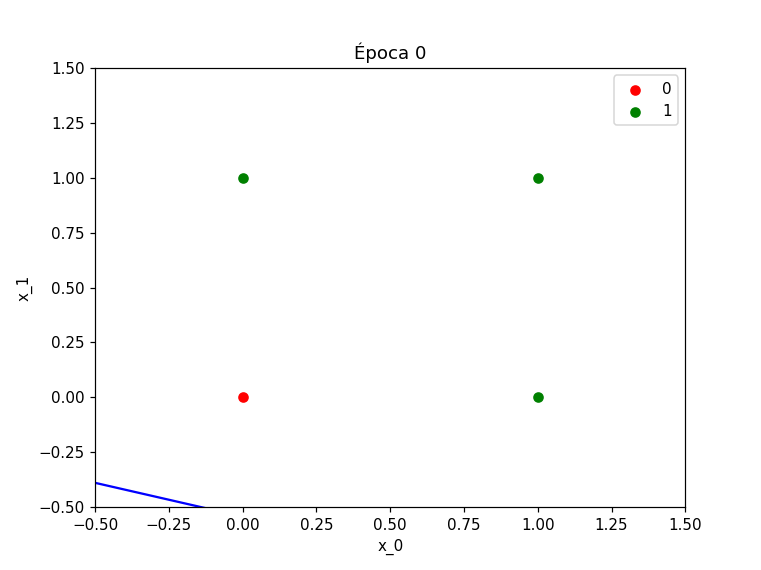


Época 1

Iteração 0
--------------------
v: 0.3377277390071145
y_out: 1
Erro: -1
Pesos: [0.19151945 0.62210877]
Bias: 0.2377277390071145

Iteração 1
--------------------
v: 0.8598365100469464
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.2377277390071145

Iteração 2
--------------------
v: 0.4292471893860068
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.2377277390071145

Iteração 3
--------------------
v: 1.0513559604258387
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.2377277390071145
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


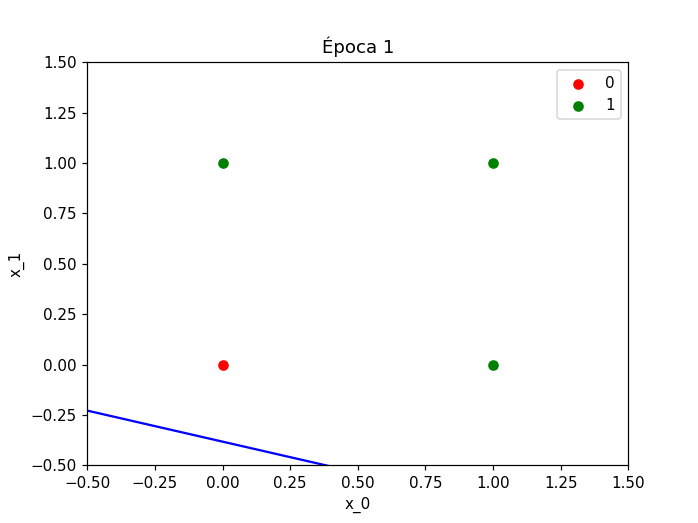


Época 2

Iteração 0
--------------------
v: 0.2377277390071145
y_out: 1
Erro: -1
Pesos: [0.19151945 0.62210877]
Bias: 0.1377277390071145

Iteração 1
--------------------
v: 0.7598365100469464
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.1377277390071145

Iteração 2
--------------------
v: 0.3292471893860068
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.1377277390071145

Iteração 3
--------------------
v: 0.9513559604258386
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.1377277390071145
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


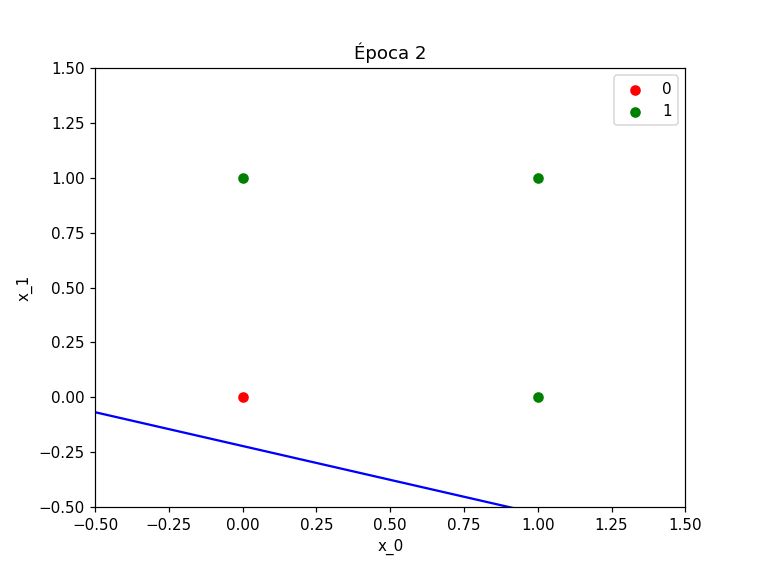


Época 3

Iteração 0
--------------------
v: 0.1377277390071145
y_out: 1
Erro: -1
Pesos: [0.19151945 0.62210877]
Bias: 0.037727739007114486

Iteração 1
--------------------
v: 0.6598365100469463
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.037727739007114486

Iteração 2
--------------------
v: 0.22924718938600677
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.037727739007114486

Iteração 3
--------------------
v: 0.8513559604258386
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.037727739007114486
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


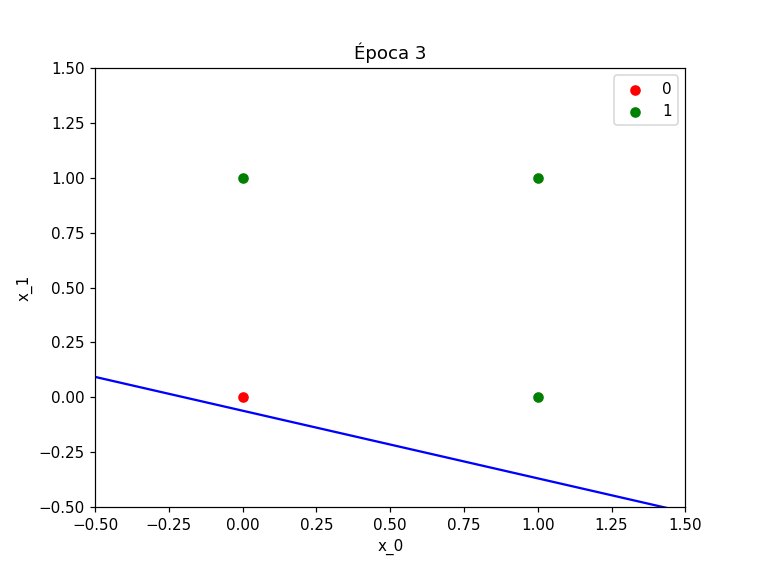


Época 4

Iteração 0
--------------------
v: 0.037727739007114486
y_out: 1
Erro: -1
Pesos: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: 0.5598365100469463
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteração 2
--------------------
v: 0.12924718938600677
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteração 3
--------------------
v: 0.7513559604258386
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: -0.06227226099288552
--------------------

Erro da época: 0.5


<IPython.core.display.Javascript object>


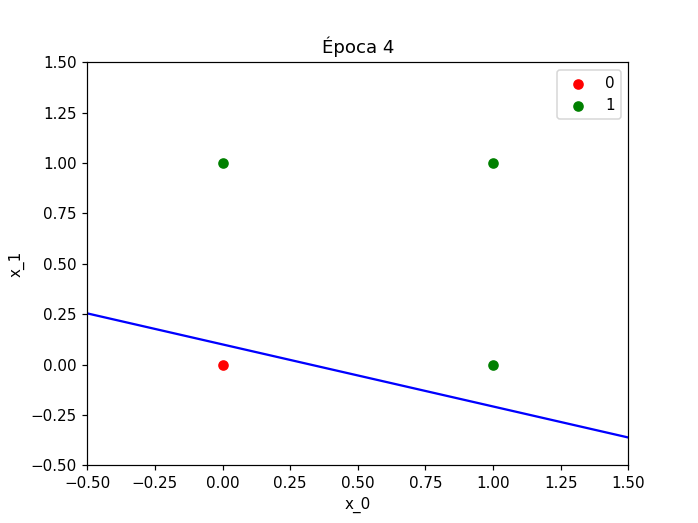


Época 5

Iteração 0
--------------------
v: -0.06227226099288552
y_out: 0
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: 0.5598365100469463
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteração 2
--------------------
v: 0.12924718938600677
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteração 3
--------------------
v: 0.7513559604258386
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: -0.06227226099288552
--------------------

Erro da época: 0.0


<IPython.core.display.Javascript object>


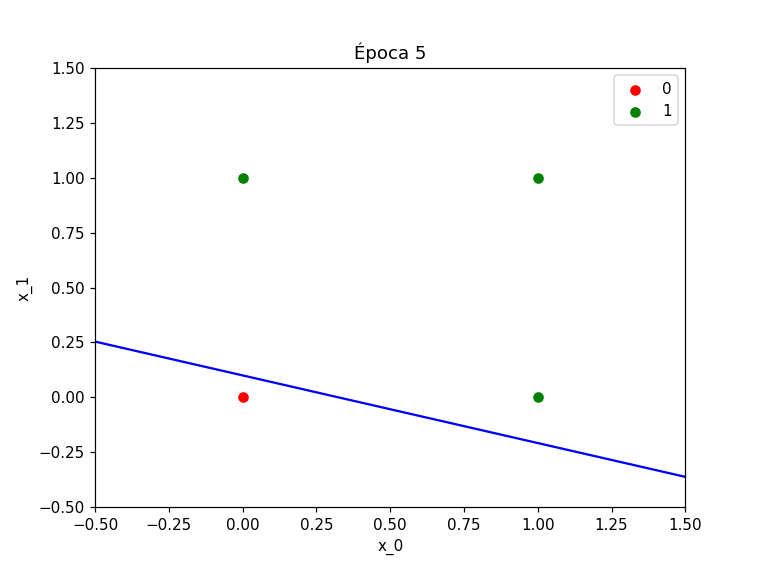

In [6]:
# Número máximo de iterações.
max_iter = 10

# Taxa de aprendizado.
learning_rate = 0.1

# Define um valor para a semente de geração de números aleatórios.
np.random.seed(1234)

# Treinamento do Perceptron
# -------------------------
fit(X, y_or)

## Função XOR

A função XOR é não linear, dessa forma, o algoritmo do perceptron não converge.

Inicialização

Pesos: [0.19151945 0.62210877]
Bias: 0.4377277390071145


<IPython.core.display.Javascript object>


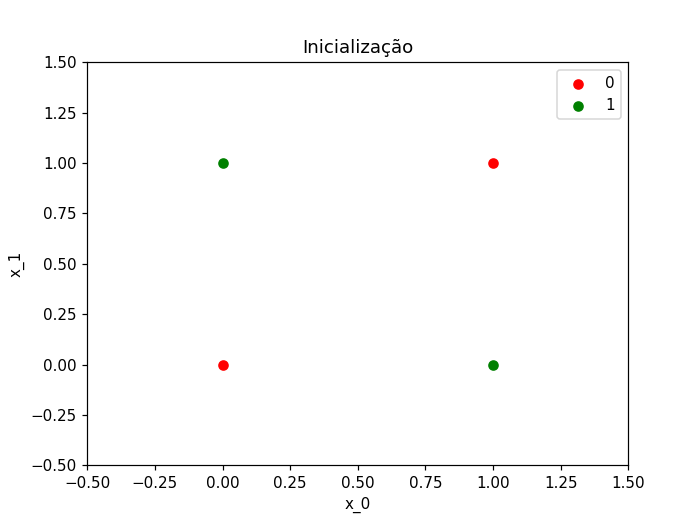


Época 0

Iteração 0
--------------------
v: 0.4377277390071145
y_out: 1
Erro: -1
Pesos: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteração 1
--------------------
v: 0.9598365100469464
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteração 2
--------------------
v: 0.5292471893860068
y_out: 1
Erro: 0
Pesos: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteração 3
--------------------
v: 1.1513559604258385
y_out: 1
Erro: -1
Pesos: [0.09151945 0.52210877]
Bias: 0.2377277390071145
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


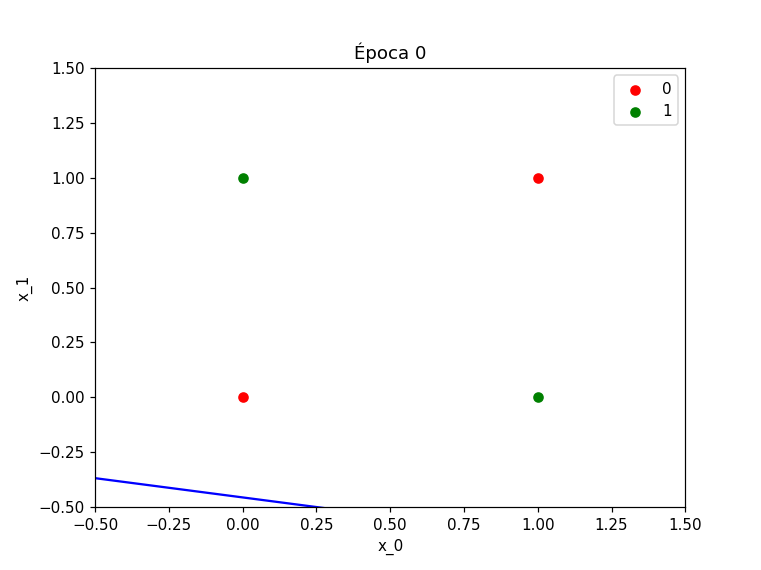


Época 1

Iteração 0
--------------------
v: 0.2377277390071145
y_out: 1
Erro: -1
Pesos: [0.09151945 0.52210877]
Bias: 0.1377277390071145

Iteração 1
--------------------
v: 0.6598365100469463
y_out: 1
Erro: 0
Pesos: [0.09151945 0.52210877]
Bias: 0.1377277390071145

Iteração 2
--------------------
v: 0.22924718938600677
y_out: 1
Erro: 0
Pesos: [0.09151945 0.52210877]
Bias: 0.1377277390071145

Iteração 3
--------------------
v: 0.7513559604258386
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.42210877]
Bias: 0.037727739007114486
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


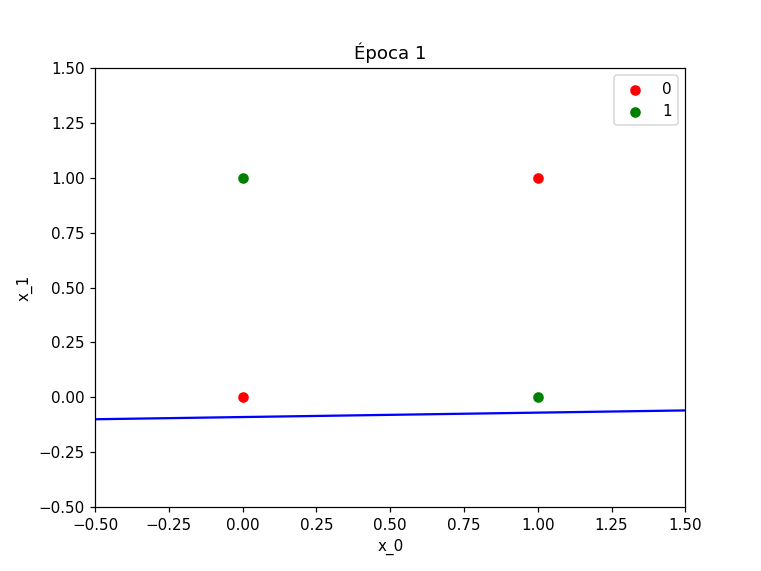


Época 2

Iteração 0
--------------------
v: 0.037727739007114486
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.42210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: 0.3598365100469464
y_out: 1
Erro: 0
Pesos: [-0.00848055  0.42210877]
Bias: -0.06227226099288552

Iteração 2
--------------------
v: -0.07075281061399324
y_out: 0
Erro: 1
Pesos: [0.09151945 0.42210877]
Bias: 0.037727739007114486

Iteração 3
--------------------
v: 0.5513559604258387
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.32210877]
Bias: -0.06227226099288552
--------------------

Erro da época: 1.5


<IPython.core.display.Javascript object>


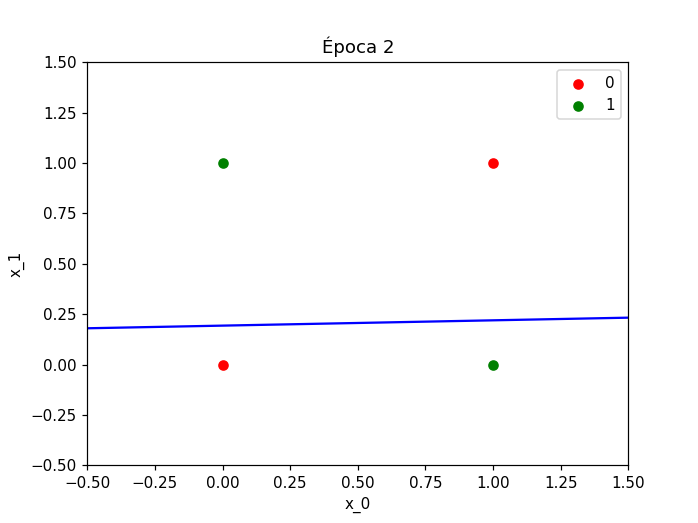


Época 3

Iteração 0
--------------------
v: -0.06227226099288552
y_out: 0
Erro: 0
Pesos: [-0.00848055  0.32210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: 0.2598365100469464
y_out: 1
Erro: 0
Pesos: [-0.00848055  0.32210877]
Bias: -0.06227226099288552

Iteração 2
--------------------
v: -0.07075281061399324
y_out: 0
Erro: 1
Pesos: [0.09151945 0.32210877]
Bias: 0.037727739007114486

Iteração 3
--------------------
v: 0.4513559604258387
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.22210877]
Bias: -0.06227226099288552
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


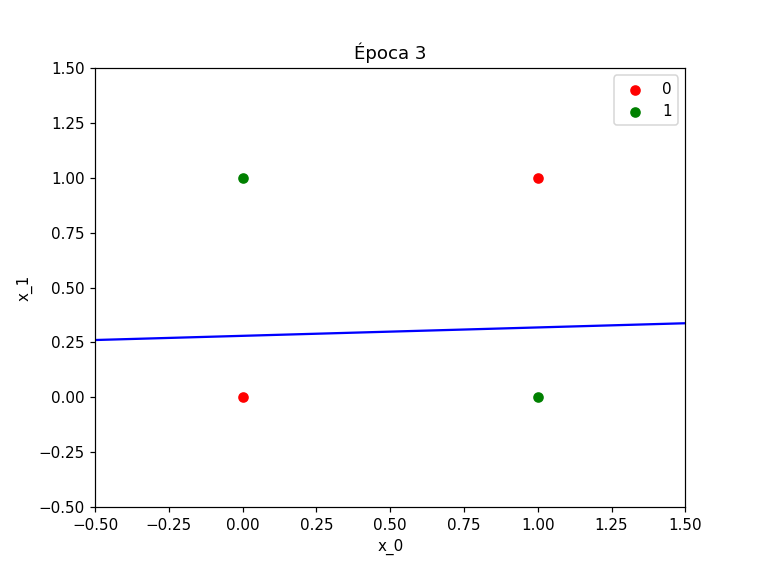


Época 4

Iteração 0
--------------------
v: -0.06227226099288552
y_out: 0
Erro: 0
Pesos: [-0.00848055  0.22210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: 0.1598365100469464
y_out: 1
Erro: 0
Pesos: [-0.00848055  0.22210877]
Bias: -0.06227226099288552

Iteração 2
--------------------
v: -0.07075281061399324
y_out: 0
Erro: 1
Pesos: [0.09151945 0.22210877]
Bias: 0.037727739007114486

Iteração 3
--------------------
v: 0.3513559604258387
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.12210877]
Bias: -0.06227226099288552
--------------------

Erro da época: 1.0


<ipython-input-2-abec7cec65e7>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


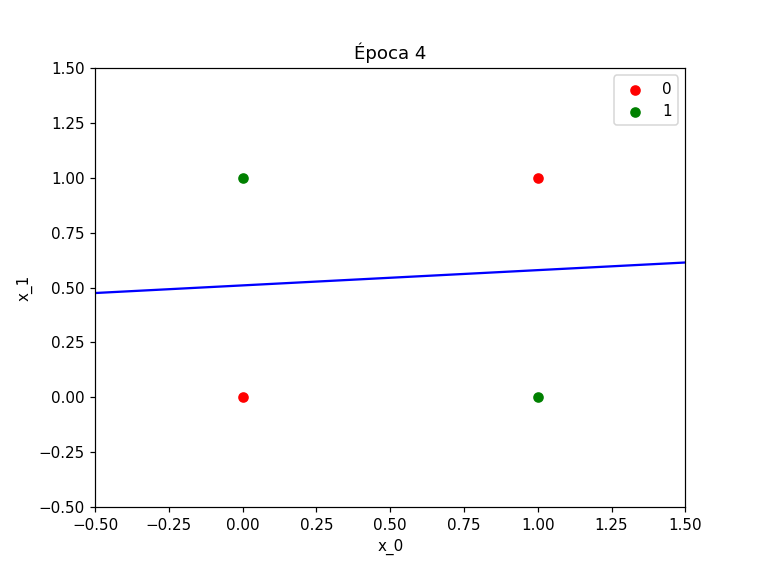


Época 5

Iteração 0
--------------------
v: -0.06227226099288552
y_out: 0
Erro: 0
Pesos: [-0.00848055  0.12210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: 0.0598365100469464
y_out: 1
Erro: 0
Pesos: [-0.00848055  0.12210877]
Bias: -0.06227226099288552

Iteração 2
--------------------
v: -0.07075281061399324
y_out: 0
Erro: 1
Pesos: [0.09151945 0.12210877]
Bias: 0.037727739007114486

Iteração 3
--------------------
v: 0.2513559604258387
y_out: 1
Erro: -1
Pesos: [-0.00848055  0.02210877]
Bias: -0.06227226099288552
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


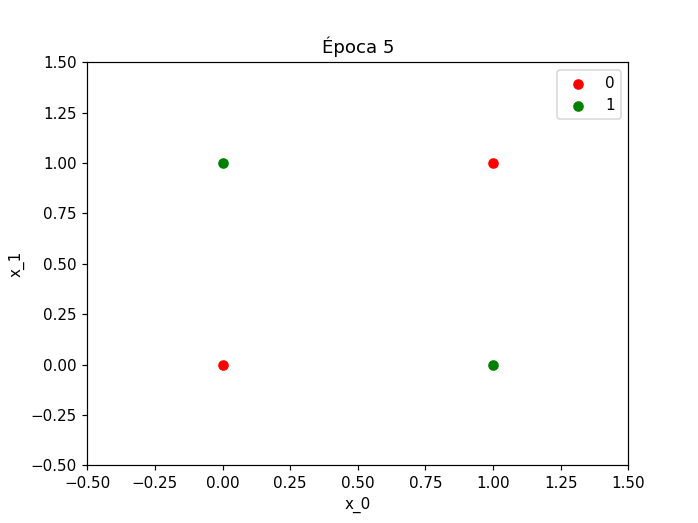


Época 6

Iteração 0
--------------------
v: -0.06227226099288552
y_out: 0
Erro: 0
Pesos: [-0.00848055  0.02210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: -0.040163489953053605
y_out: 0
Erro: 1
Pesos: [-0.00848055  0.12210877]
Bias: 0.037727739007114486

Iteração 2
--------------------
v: 0.02924718938600676
y_out: 1
Erro: 0
Pesos: [-0.00848055  0.12210877]
Bias: 0.037727739007114486

Iteração 3
--------------------
v: 0.15135596042583868
y_out: 1
Erro: -1
Pesos: [-0.10848055  0.02210877]
Bias: -0.06227226099288552
--------------------

Erro da época: 1.0


<IPython.core.display.Javascript object>


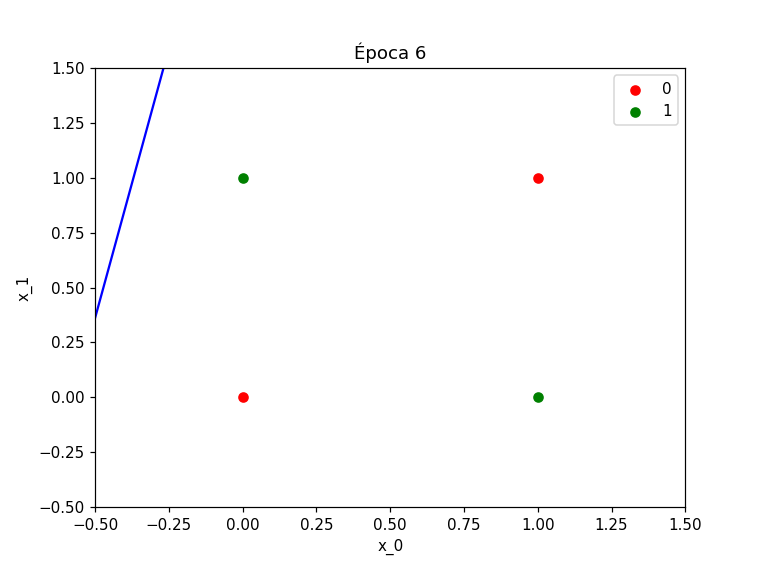


Época 7

Iteração 0
--------------------
v: -0.06227226099288552
y_out: 0
Erro: 0
Pesos: [-0.10848055  0.02210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: -0.040163489953053605
y_out: 0
Erro: 1
Pesos: [-0.10848055  0.12210877]
Bias: 0.037727739007114486

Iteração 2
--------------------
v: -0.07075281061399324
y_out: 0
Erro: 1
Pesos: [-0.00848055  0.12210877]
Bias: 0.1377277390071145

Iteração 3
--------------------
v: 0.2513559604258387
y_out: 1
Erro: -1
Pesos: [-0.10848055  0.02210877]
Bias: 0.037727739007114486
--------------------

Erro da época: 1.5


<IPython.core.display.Javascript object>


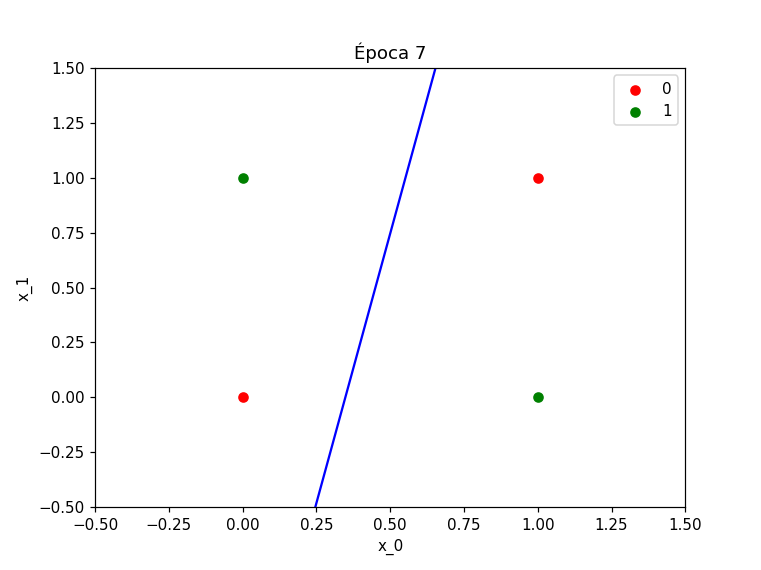


Época 8

Iteração 0
--------------------
v: 0.037727739007114486
y_out: 1
Erro: -1
Pesos: [-0.10848055  0.02210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: -0.040163489953053605
y_out: 0
Erro: 1
Pesos: [-0.10848055  0.12210877]
Bias: 0.037727739007114486

Iteração 2
--------------------
v: -0.07075281061399324
y_out: 0
Erro: 1
Pesos: [-0.00848055  0.12210877]
Bias: 0.1377277390071145

Iteração 3
--------------------
v: 0.2513559604258387
y_out: 1
Erro: -1
Pesos: [-0.10848055  0.02210877]
Bias: 0.037727739007114486
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


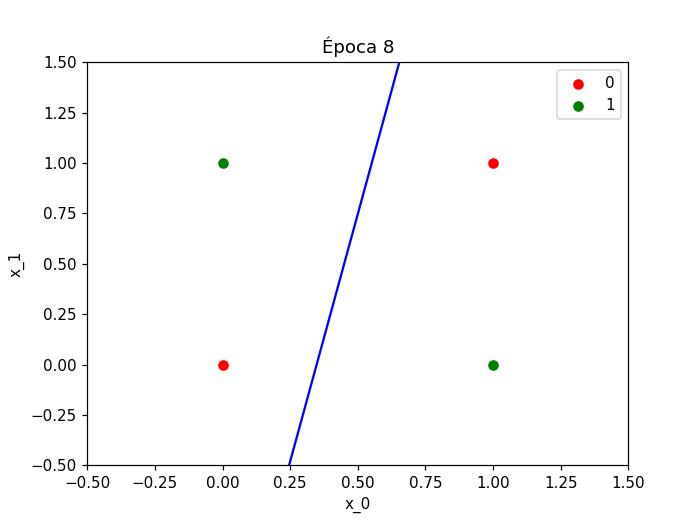


Época 9

Iteração 0
--------------------
v: 0.037727739007114486
y_out: 1
Erro: -1
Pesos: [-0.10848055  0.02210877]
Bias: -0.06227226099288552

Iteração 1
--------------------
v: -0.040163489953053605
y_out: 0
Erro: 1
Pesos: [-0.10848055  0.12210877]
Bias: 0.037727739007114486

Iteração 2
--------------------
v: -0.07075281061399324
y_out: 0
Erro: 1
Pesos: [-0.00848055  0.12210877]
Bias: 0.1377277390071145

Iteração 3
--------------------
v: 0.2513559604258387
y_out: 1
Erro: -1
Pesos: [-0.10848055  0.02210877]
Bias: 0.037727739007114486
--------------------

Erro da época: 2.0


<IPython.core.display.Javascript object>


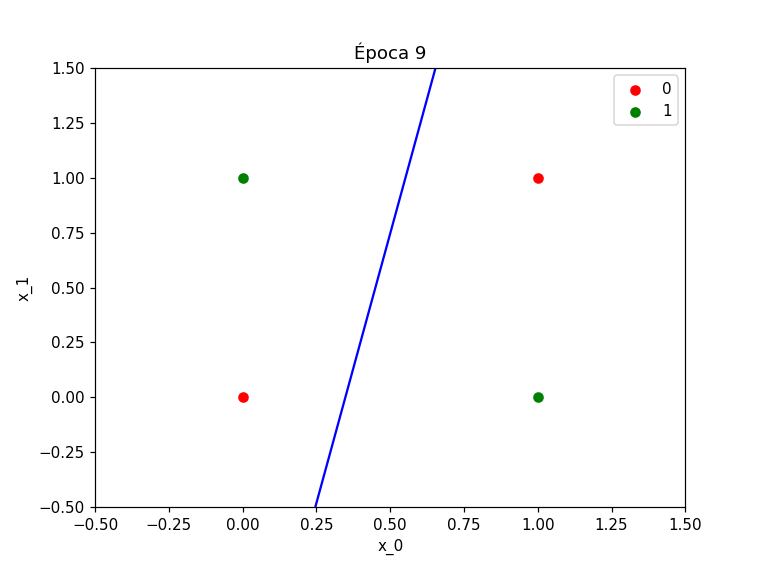

In [7]:
# Número máximo de iterações.
max_iter = 10

# Taxa de aprendizado.
learning_rate = 0.1

# Define um valor para a semente de geração de números aleatórios.
np.random.seed(1234)

# Treinamento do Perceptron
# -------------------------
fit(X, y_xor)

## Treinando o modelo com o conjunto de dados Íris
---

In [8]:
# Carregando o conjunto de dados IRIS
# ============================================            
iris = datasets.load_iris()

# Todas as três classes:
# Apenas 2 atributos: comprimento da sépala (0) e largura da sépala (1)
# ----------------------
## X = iris.data[:, :2]
## y = iris.target

# Seleciona apenas as classes Setosa (0) e Virginica (1).
# Apenas 2 atributos: comprimento da sépala (0) e largura da sépala (1)
# -------------------------------------------------------
X = iris.data[iris.target < 2, :2]
y = iris.target[iris.target < 2]

In [9]:
# Divide conjunto de treino (70 %) e testes (30 %)
X, X_test, y, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

# Normaliza os dados.
# -------------------
X = preprocessing.scale(X)
print('Média e desvio padrão:')
print(X.mean(axis=0), X.std(axis=0))

Média e desvio padrão:
[1.77001271e-15 9.01659699e-16] [1. 1.]


Inicialização

Pesos: [0.19151945 0.62210877]
Bias: 0.4377277390071145


<IPython.core.display.Javascript object>


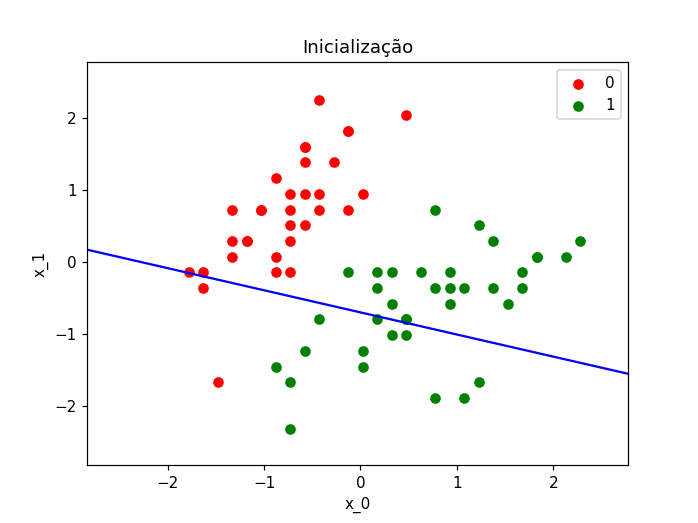


Época 0

Iteração 0
--------------------
v: 0.6934082412757296
y_out: 1
Erro: -1
Pesos: [0.20180001 0.61483395]
Bias: 0.42772773900711447

Iteração 1
--------------------
v: 0.3381585497565798
y_out: 1
Erro: -1
Pesos: [0.21508532 0.61193026]
Bias: 0.41772773900711446

Iteração 2
--------------------
v: 1.0295437983085423
y_out: 1
Erro: 0
Pesos: [0.21508532 0.61193026]
Bias: 0.41772773900711446

Iteração 3
--------------------
v: 0.7710322888366263
y_out: 1
Erro: -1
Pesos: [0.21935636 0.60465544]
Bias: 0.40772773900711445

Iteração 4
--------------------
v: -0.7656634036044404
y_out: 0
Erro: 1
Pesos: [0.21208056 0.587889  ]
Bias: 0.41772773900711446

Iteração 5
--------------------
v: 1.4609871289962166
y_out: 1
Erro: -1
Pesos: [0.21334685 0.56968633]
Bias: 0.40772773900711445

Iteração 6
--------------------
v: 0.3612185273157523
y_out: 1
Erro: 0
Pesos: [0.21334685 0.56968633]
Bias: 0.40772773900711445

Iteração 7
--------------------
v: 0.8383077315074111
y_out: 1
Erro: 0
Pesos: [0.2

<IPython.core.display.Javascript object>


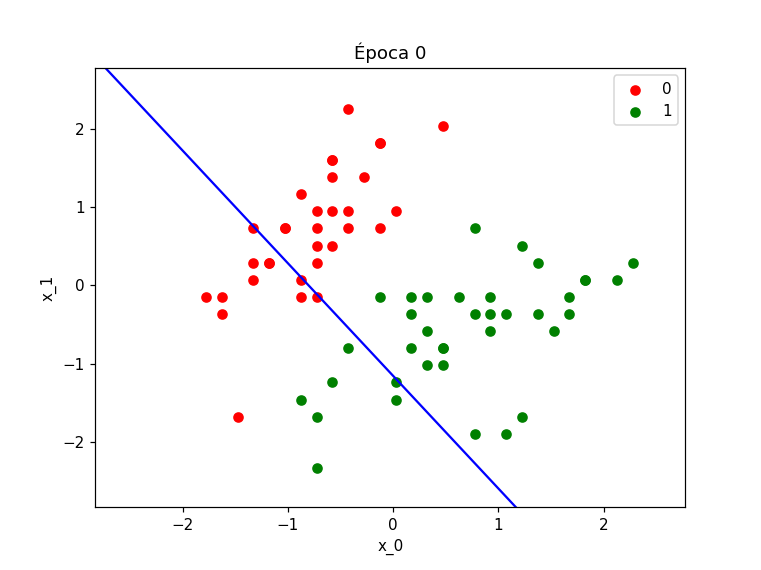


Época 1

Iteração 0
--------------------
v: 0.0937704508342205
y_out: 1
Erro: -1
Pesos: [0.34351715 0.2245225 ]
Bias: 0.2577277390071143

Iteração 1
--------------------
v: -0.13345123404526127
y_out: 0
Erro: 0
Pesos: [0.34351715 0.2245225 ]
Bias: 0.2577277390071143

Iteração 2
--------------------
v: 0.6872201709527865
y_out: 1
Erro: 0
Pesos: [0.34351715 0.2245225 ]
Bias: 0.2577277390071143

Iteração 3
--------------------
v: 0.2743461649932556
y_out: 1
Erro: -1
Pesos: [0.34778819 0.21724767]
Bias: 0.2477277390071143

Iteração 4
--------------------
v: -0.3695629959561024
y_out: 0
Erro: 1
Pesos: [0.34051239 0.20048124]
Bias: 0.2577277390071143

Iteração 5
--------------------
v: 0.5795383767231073
y_out: 1
Erro: -1
Pesos: [0.34177868 0.18227857]
Bias: 0.2477277390071143

Iteração 6
--------------------
v: 0.28039625375750254
y_out: 1
Erro: 0
Pesos: [0.34177868 0.18227857]
Bias: 0.2477277390071143

Iteração 7
--------------------
v: 0.8850632401093038
y_out: 1
Erro: 0
Pesos: [0.341778

<IPython.core.display.Javascript object>


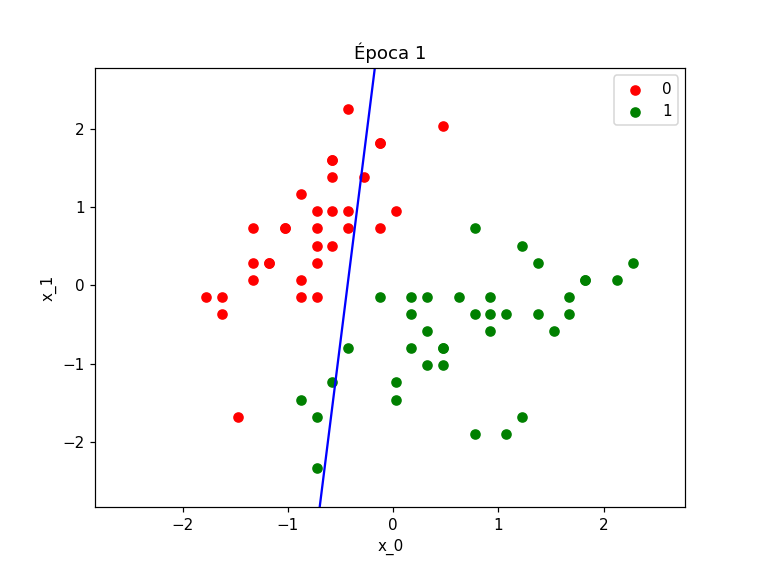


Época 2

Iteração 0
--------------------
v: -0.2409015556274175
y_out: 0
Erro: 0
Pesos: [ 0.36369194 -0.03399912]
Bias: 0.15772773900711423

Iteração 1
--------------------
v: -0.3353205988521888
y_out: 0
Erro: 0
Pesos: [ 0.36369194 -0.03399912]
Bias: 0.15772773900711423

Iteração 2
--------------------
v: 0.41478163246420785
y_out: 1
Erro: 0
Pesos: [ 0.36369194 -0.03399912]
Bias: 0.15772773900711423

Iteração 3
--------------------
v: -0.02234049293020887
y_out: 0
Erro: 0
Pesos: [ 0.36369194 -0.03399912]
Bias: 0.15772773900711423

Iteração 4
--------------------
v: -0.04988283959773149
y_out: 0
Erro: 1
Pesos: [ 0.35641614 -0.05076556]
Bias: 0.16772773900711424

Iteração 5
--------------------
v: 0.030188250876646117
y_out: 1
Erro: -1
Pesos: [ 0.35768242 -0.06896823]
Bias: 0.15772773900711423

Iteração 6
--------------------
v: 0.2300303677856096
y_out: 1
Erro: 0
Pesos: [ 0.35768242 -0.06896823]
Bias: 0.15772773900711423

Iteração 7
--------------------
v: 0.8060683946629653
y_out: 1


<IPython.core.display.Javascript object>


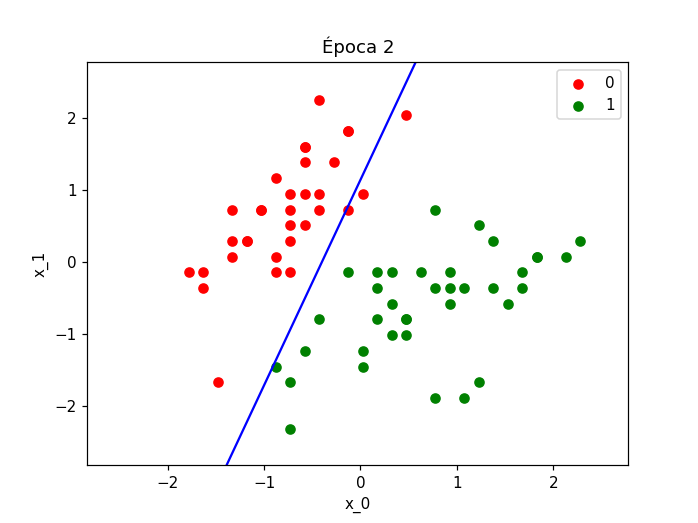


Época 3

Iteração 0
--------------------
v: -0.3049351907071842
y_out: 0
Erro: 0
Pesos: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteração 1
--------------------
v: -0.35590906531672184
y_out: 0
Erro: 0
Pesos: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteração 2
--------------------
v: 0.3173939352256029
y_out: 1
Erro: 0
Pesos: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteração 3
--------------------
v: -0.09749214872958845
y_out: 0
Erro: 0
Pesos: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteração 4
--------------------
v: 0.08889838536754616
y_out: 1
Erro: 0
Pesos: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteração 5
--------------------
v: -0.1256397436889416
y_out: 0
Erro: 0
Pesos: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteração 6
--------------------
v: 0.21544618600652787
y_out: 1
Erro: 0
Pesos: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteração 7
--------------------
v: 0.7595407282552861
y_out: 1
Erro: 0
P

<IPython.core.display.Javascript object>


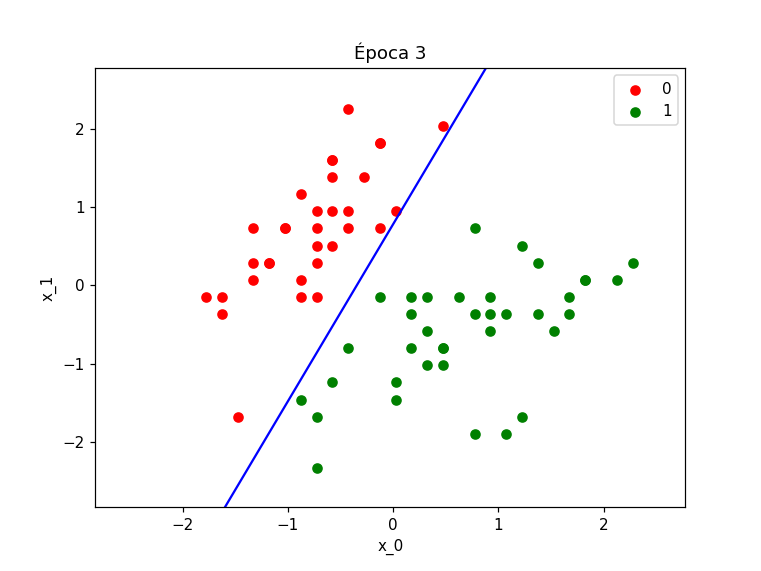


Época 4

Iteração 0
--------------------
v: -0.3415305367771743
y_out: 0
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 1
--------------------
v: -0.3779610003603502
y_out: 0
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 2
--------------------
v: 0.27182162579035696
y_out: 1
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 3
--------------------
v: -0.13707981592133045
y_out: 0
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 4
--------------------
v: 0.12256675629685211
y_out: 1
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 5
--------------------
v: -0.1993416976052742
y_out: 0
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 6
--------------------
v: 0.19896069862400556
y_out: 1
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 7
--------------------
v: 0.728302732555203
y_out: 1
Err

v: -0.02778842517180384
y_out: 0
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 68
--------------------
v: 0.43277585274142005
y_out: 1
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteração 69
--------------------
v: 0.542067243490947
y_out: 1
Erro: 0
Pesos: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421
--------------------

Erro da época: 0.0


<IPython.core.display.Javascript object>


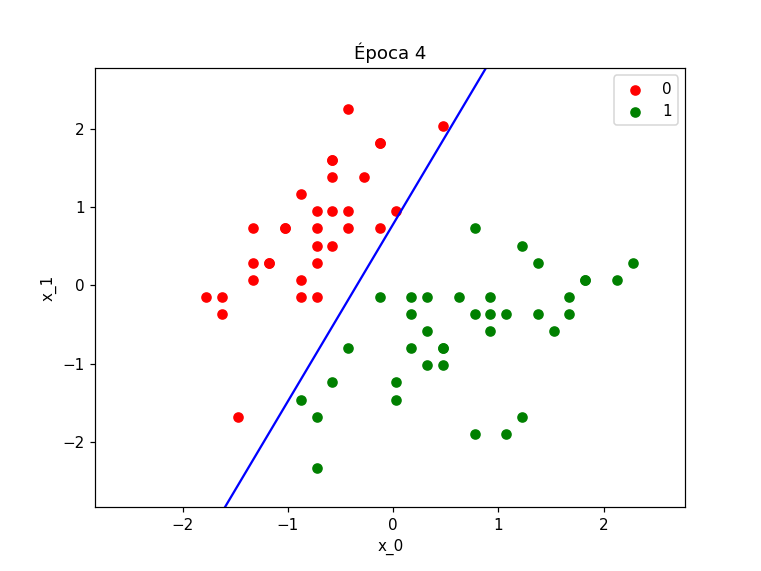

In [10]:
# Define hiperparâmetros e configurações iniciais
# -----------------------------------------------
# Número máximo de iterações.
max_iter = 40

# Taxa de aprendizado.
learning_rate = 0.01

# Define um valor para a semente de geração de números aleatórios.
np.random.seed(1234)

# Treinamento do Perceptron
# -------------------------
fit(X, y)

## Referencias
---

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.